# Problem 3


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.manifold import TSNE

# Load the data
wine = load_wine()
X = wine.data
y = wine.target

df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

print(df.columns)


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_2365/2078660465.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x600 with 0 Axes>

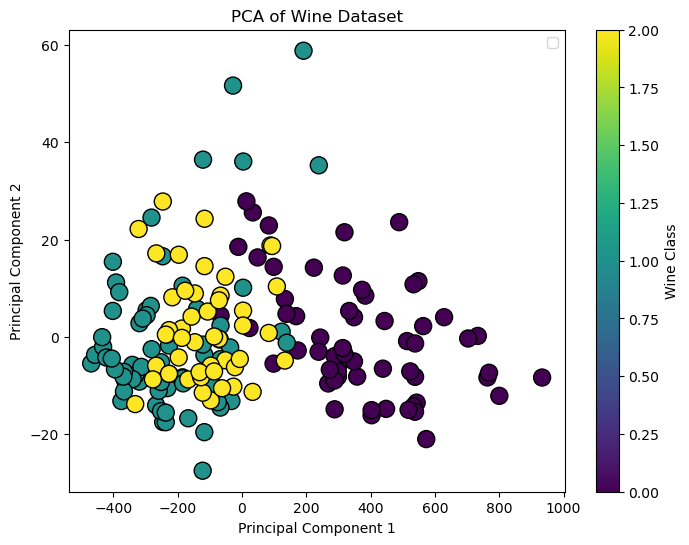

In [10]:
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the PCA results
plt.figure(figsize=(10, 6))
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor = 'k', s=150)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.colorbar(label='Wine Class')
plt.legend()
plt.show()


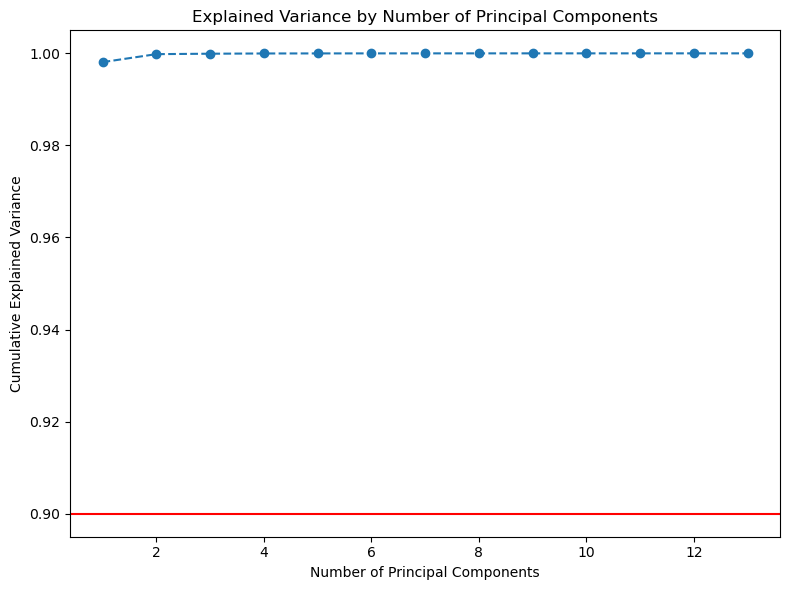

Number of components for 90% variance: 1


In [11]:
# plotting explained variance
pca_full = PCA()
pca_full.fit(X)

explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.tight_layout()
plt.show()

n_componets_90 = np.argmax(explained_variance >= 0.9) + 1
print(f"Number of components for 90% variance: {n_componets_90}")




Text(0.5, 1.0, 't-SNE of Wine Dataset')

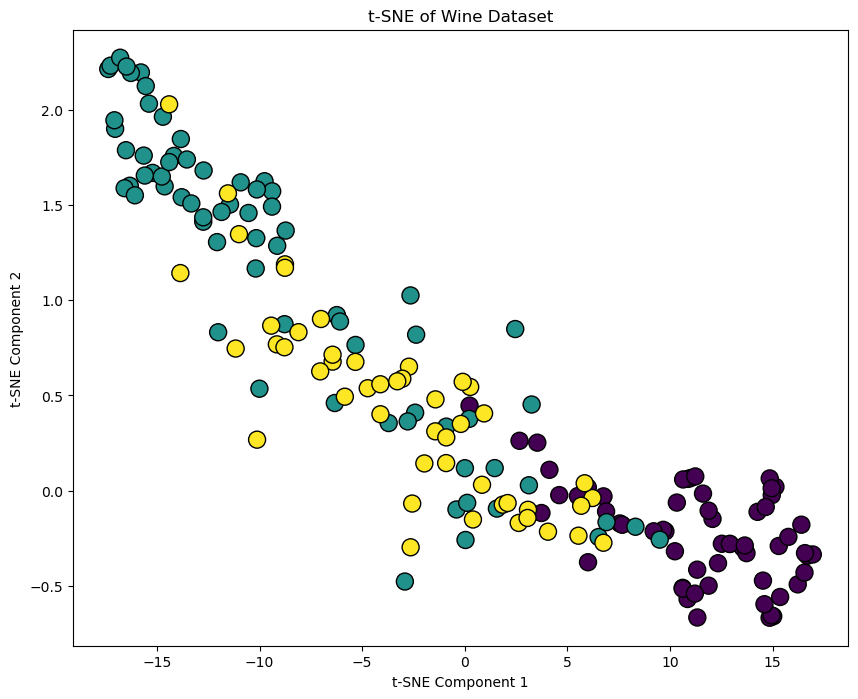

In [12]:
# t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10,8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Wine Dataset')